In [3]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

from funcs import load_stocks_dataframe
df = load_stocks_dataframe()
df = df.dropna()

In [4]:
df.head()

,Date,GrowthStock_AdjClose,GrowthStock_PercentChange,ValueStock_AdjClose,ValueStock_PercentChange,Treasury10yr_AdjClose,Treasury10yr_PercentChange,Treasury10yr_Diff,exchange,exchange_PercentChange,exchange_Diff,inflation5yr,inflation5yr_PercentChange,inflation5yr_Diff,CPI,CPI_PercentChange,CPI_Diff
712,2003-04-01,8.603225,0.010614,26.337534,0.016642,3.827,0.001046,0.004,1.4729,0.002314,0.0034,1.64,-0.006061,-0.01,2.17513,-0.034786,-0.07839
713,2003-04-02,8.835845,0.027039,27.103275,0.029074,3.932,0.027437,0.105,1.4762,0.002240,0.0033,1.66,0.012195,0.02,2.17513,-0.034786,-0.07839
714,2003-04-03,8.831999,-0.000435,26.878065,-0.008309,3.916,-0.004069,-0.016,1.4760,-0.000135,-0.0002,1.64,-0.012048,-0.02,2.17513,-0.034786,-0.07839
715,2003-04-04,8.824308,-0.000871,27.038921,0.005985,3.944,0.007150,0.028,1.4720,-0.002710,-0.0040,1.63,-0.006098,-0.01,2.17513,-0.034786,-0.07839
716,2003-04-07,8.828156,0.000436,27.109701,0.002618,4.014,0.017748,0.070,1.4843,0.008356,0.0123,1.61,-0.012270,-0.02,2.17513,-0.034786,-0.07839


In [13]:
df.index = pd.DatetimeIndex(df["Date"])
df

,Date,GrowthStock_AdjClose,GrowthStock_PercentChange,ValueStock_AdjClose,ValueStock_PercentChange,Treasury10yr_AdjClose,Treasury10yr_PercentChange,Treasury10yr_Diff,exchange,exchange_PercentChange,exchange_Diff,inflation5yr,inflation5yr_PercentChange,inflation5yr_Diff,CPI,CPI_PercentChange,CPI_Diff
Date,,,,,,,,,,,,,,,,,
2003-04-01,2003-04-01,8.603225,0.010614,26.337534,0.016642,3.827,0.001046,0.004,1.4729,0.002314,0.0034,1.64,-0.006061,-0.01,2.17513,-0.034786,-0.07839
2003-04-02,2003-04-02,8.835845,0.027039,27.103275,0.029074,3.932,0.027437,0.105,1.4762,0.002240,0.0033,1.66,0.012195,0.02,2.17513,-0.034786,-0.07839
2003-04-03,2003-04-03,8.831999,-0.000435,26.878065,-0.008309,3.916,-0.004069,-0.016,1.4760,-0.000135,-0.0002,1.64,-0.012048,-0.02,2.17513,-0.034786,-0.07839
2003-04-04,2003-04-04,8.824308,-0.000871,27.038921,0.005985,3.944,0.007150,0.028,1.4720,-0.002710,-0.0040,1.63,-0.006098,-0.01,2.17513,-0.034786,-0.07839
2003-04-07,2003-04-07,8.828156,0.000436,27.109701,0.002618,4.014,0.017748,0.070,1.4843,0.008356,0.0123,1.61,-0.012270,-0.02,2.17513,-0.034786,-0.07839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-07,2022-01-07,79.930000,-0.009664,158.410004,0.002658,1.771,0.021927,0.038,1.2643,-0.006444,-0.0082,2.78,0.003610,0.01,7.09654,0.039273,0.26817
2022-01-10,2022-01-10,79.989998,0.000751,157.820007,-0.003724,1.780,0.005082,0.009,1.2679,0.002847,0.0036,2.77,-0.003597,-0.01,7.09654,0.039273,0.26817
2022-01-11,2022-01-11,80.860001,0.010876,158.929993,0.007033,1.746,-0.019101,-0.034,1.2598,-0.006389,-0.0081,2.87,0.036101,0.10,7.09654,0.039273,0.26817


In [14]:
recency = -1000
y_train = df.iloc[:recency]["GrowthStock_AdjClose"]
y_test  = df.iloc[recency:]["GrowthStock_AdjClose"]
y_train.shape, y_test.shape

((2696,), (1000,))

In [15]:
m = y_train.mean()
time = y_train.index

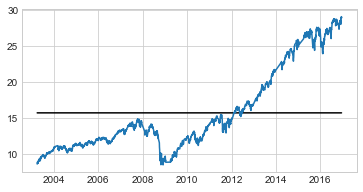

In [16]:
fig, ax = plt.subplots(1, figsize = (6, 3))
ax.plot(time, np.ones(len(time))*m, label = "reference", color = "black")
ax.plot(y_train, label = "Growth Stock Price")

In [ ]:
###

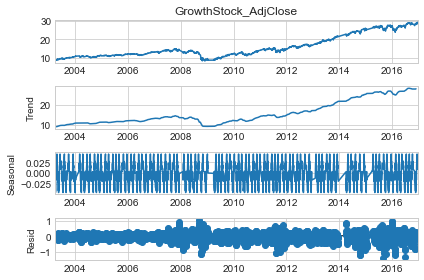

In [19]:
decomposition = sm.tsa.seasonal_decompose(y_train, model='additive', period = 30)
fig = decomposition.plot()

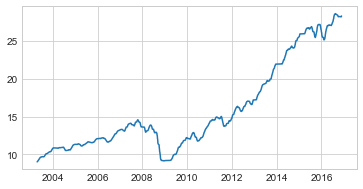

In [21]:
trend = decomposition.trend
time = trend.index
m = decomposition.trend.mean()
fig, ax = plt.subplots(1, figsize = (6,3))
ax.plot(trend, label = 'trend')